In [42]:
%matplotlib inline

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('dark')
plt.style.use('fivethirtyeight')

In [44]:
PATH ='../datafiles/titanic/'

In [45]:
!ls {PATH}

test.csv  train.csv


In [46]:
titanic = pd.read_csv(f'{PATH}/train.csv', sep=',', index_col='PassengerId', parse_dates=True)

In [47]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [48]:
titanic.shape

(891, 11)

####  Grouping the datset by sex and getting each columns mean value

In [49]:
group_by_sex = titanic.groupby('Sex').mean()
group_by_sex

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


### The next three figures shows the distribution between the survival chance based on Age and Sex 

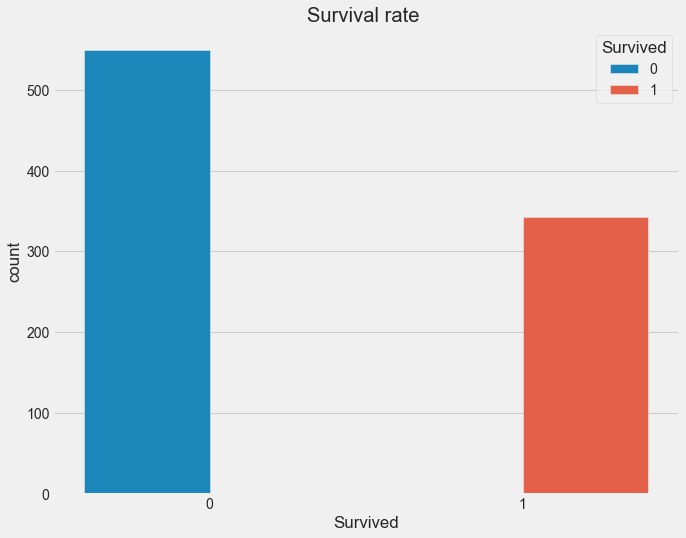

In [50]:
plt.figure(figsize=(10,8))
plt.title('Survival rate ')
sns.countplot('Survived', data=titanic, hue='Survived')
plt.show()

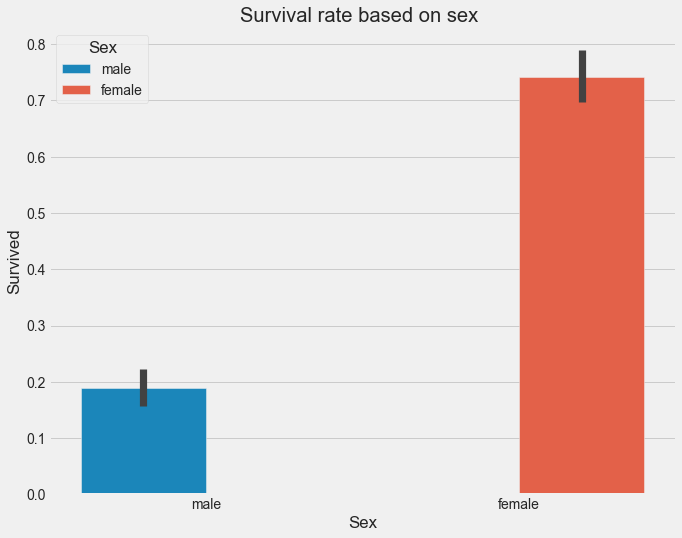

In [51]:
plt.figure(figsize=(10,8))
plt.title('Survival rate based on sex ')
sns.barplot(x='Sex', y='Survived', data=titanic, hue='Sex')
plt.show()

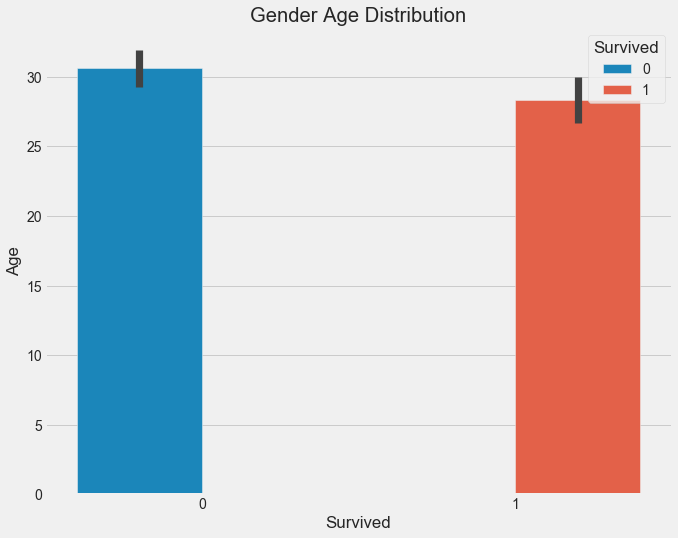

In [52]:
plt.figure(figsize=(10,8))
plt.title('Gender Age Distribution')
sns.barplot(x='Survived', y='Age', data=titanic, hue='Survived')

## New dataset for males that survived

In [53]:
#locate the male column and find all who survived
male_percent_survived = titanic.loc[(titanic.Sex == 'male') & (titanic.Survived > 0)]
male_percent_survived

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...
839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S


In [54]:
#Which passenger class had the most survivals
male_percent_survived.Pclass.value_counts()

3    47
1    45
2    17
Name: Pclass, dtype: int64

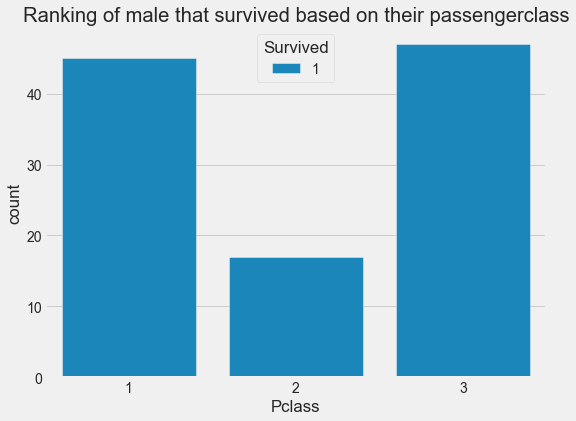

In [55]:
plt.figure(figsize=(8,6))
plt.title('Ranking of male that survived based on their passengerclass')
sns.countplot(x=male_percent_survived.Pclass, data=male_percent_survived, hue='Survived')

In [56]:
#Which Age had the most survivals
male_percent_survived.Age.value_counts()

32.00    7
27.00    6
3.00     4
25.00    4
36.00    4
42.00    3
29.00    3
31.00    3
48.00    3
20.00    3
35.00    3
26.00    3
1.00     3
49.00    2
34.00    2
19.00    2
4.00     2
45.00    2
0.83     2
9.00     2
28.00    2
18.00    1
24.00    1
40.00    1
16.00    1
38.00    1
12.00    1
23.00    1
37.00    1
0.67     1
30.00    1
62.00    1
51.00    1
11.00    1
6.00     1
50.00    1
56.00    1
80.00    1
60.00    1
22.00    1
2.00     1
17.00    1
0.92     1
8.00     1
52.00    1
44.00    1
39.00    1
0.42     1
21.00    1
Name: Age, dtype: int64

In [57]:
male_age_above_092 = male_percent_survived.loc[male_percent_survived.Age > 0.92]
male_age_above_092

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
...,...,...,...,...,...,...,...,...,...,...,...
828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C
839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S


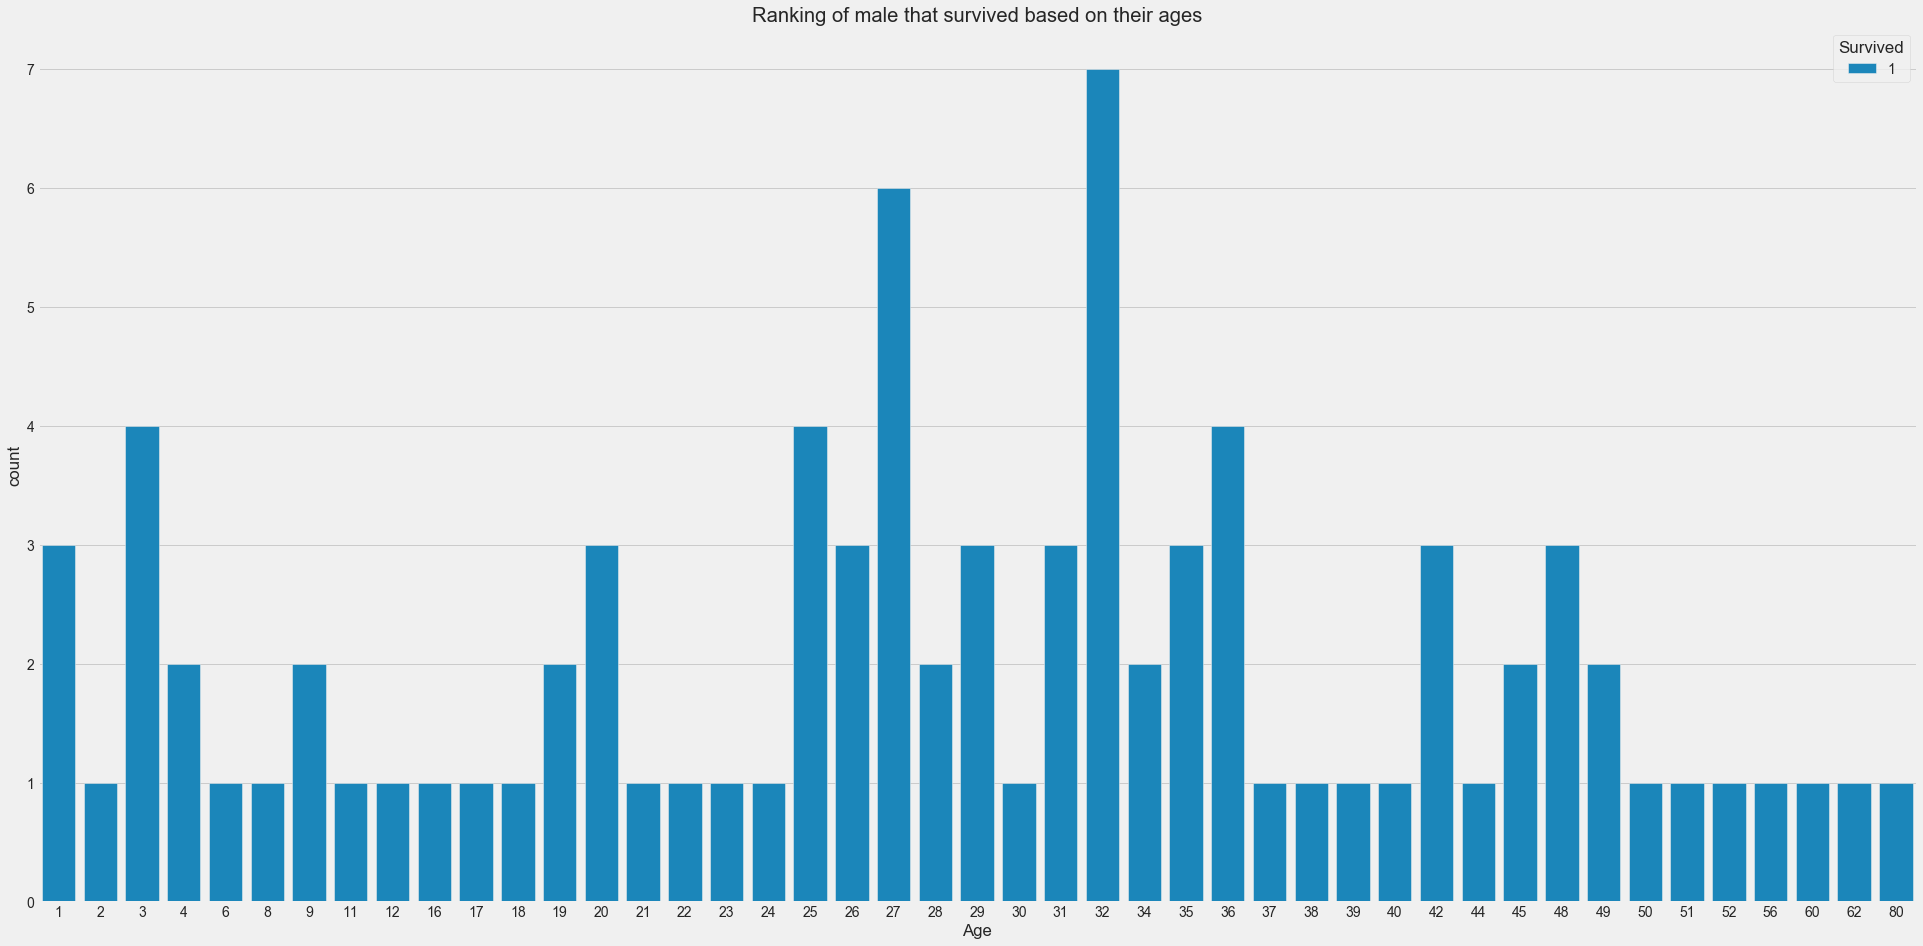

In [58]:
plt.figure(figsize=(30,15))
plt.title('Ranking of male that survived based on their ages')
sns.countplot(x=male_age_above_092.Age.astype(int) , data=male_percent_survived, hue='Survived')